#### Download data from Kaggle

In [2]:
from kaggle_utils.src import KaggleDataApi

In [3]:
kda = KaggleDataApi(call_path = CURRENT_ROOT_DIR)
kda.download_kaggle_dataset(dataset_name="facial_keypoints_detection")

File downloaded and saved to:   c:\users\sankr\documents\projects\git_work\experiments\data\facial-keypoints-detection.zip


In [4]:
kda.unzip_and_return_folder_details()

('c:\\users\\sankr\\documents\\projects\\git_work\\experiments\\data\\facial-keypoints-detection',
 ['IdLookupTable.csv', 'SampleSubmission.csv', 'test.zip', 'training.zip'])

In [7]:
for file_name in ["test.zip", "training.zip"]:
    complete_path = os.path.join(root_folder, file_name)
    with zipfile.ZipFile(complete_path, 'r') as zip_ref:
        zip_ref.extractall(root_folder)

#### Data exploration

In [23]:
root_folder = "c:\\users\\sankr\\documents\\projects\\git_work\\experiments\\data\\facial-keypoints-detection"
import os
import zipfile
import pandas as pd
import numpy as np

In [24]:
os.listdir(root_folder)

['IdLookupTable.csv',
 'SampleSubmission.csv',
 'test',
 'test.csv',
 'test.zip',
 'training',
 'training.csv',
 'training.zip']

In [25]:
annotation_file = os.path.join(root_folder, "IdLookupTable.csv")
submission_file = os.path.join(root_folder, "SampleSubmission.csv")
test_data = os.path.join(root_folder, "test.csv")
train_data = os.path.join(root_folder, "training.csv")

In [26]:
os.makedirs(os.path.join(root_folder, train_data.replace("csv", "")), exist_ok =True)
os.makedirs(os.path.join(root_folder, test_data.replace("csv", "")), exist_ok = True)

In [27]:
from PIL import Image

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv(train_data)

In [30]:
df["Image"] = df.Image.apply(lambda x: np.array(x.split(" "), dtype="float"))
df["Image"] = df.Image.apply(lambda pixel: pixel.reshape(96, 96, 1))
df["Image"] = df.Image.apply(lambda pixel: pixel/255)

In [31]:
images = df.pop("Image")

In [32]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [33]:
images[0]

array([[[0.93333333],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333333],
        [0.9254902 ],
        ...,
        [0.97647059],
        [0.98039216],
        [0.98431373]],

       [[0.92941176],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98431373],
        [0.98431373],
        [0.98039216]],

       ...,

       [[0.72941176],
        [0.71764706],
        [0.70980392],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.74117647],
        [0.7372549 ],
        [0.81176471],
        ...,
        [0.23921569],
        [0.27058824],
        [0.30588235]],

       [[0.74901961],
        [0.72156863],
        [0.72156863],
        ...,
        [0.2745098 ],
        [0.29411765],
        [0.35294118]]])

In [34]:
isinstance(images[0], np.ndarray)

True

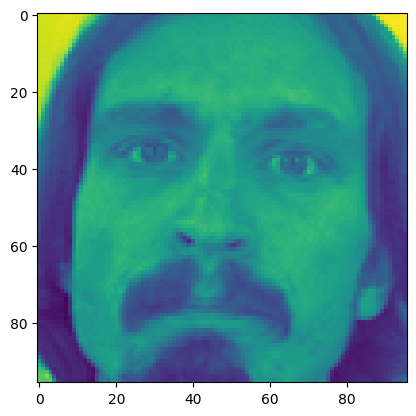

In [35]:
from matplotlib import pyplot as plt

plt.imshow(images[0])

In [36]:
images[0]

array([[[0.93333333],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98039216],
        [0.98039216],
        [0.98039216]],

       [[0.92156863],
        [0.93333333],
        [0.9254902 ],
        ...,
        [0.97647059],
        [0.98039216],
        [0.98431373]],

       [[0.92941176],
        [0.9254902 ],
        [0.92941176],
        ...,
        [0.98431373],
        [0.98431373],
        [0.98039216]],

       ...,

       [[0.72941176],
        [0.71764706],
        [0.70980392],
        ...,
        [0.20392157],
        [0.22352941],
        [0.23529412]],

       [[0.74117647],
        [0.7372549 ],
        [0.81176471],
        ...,
        [0.23921569],
        [0.27058824],
        [0.30588235]],

       [[0.74901961],
        [0.72156863],
        [0.72156863],
        ...,
        [0.2745098 ],
        [0.29411765],
        [0.35294118]]])

#### Modelling

In [ ]:
from src.cv.pytorch.data_loader.use_cases.facial_keypoint_detection.dataloader import FacialKeypointDataLoader
from src.cv.pytorch.models.configs import ModelTrainingConfig, ModelDataConfig
from src.cv.pytorch.models.use_cases.facial_keypoint_detection.utils import show_key_points_on_images
from src import CURRENT_ROOT_DIR

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [ ]:
fkdl = FacialKeypointDataLoader(
    dataset_name="faces", 
    data_type = "csv",
    data_file=r"data/facial-keypoints-detection/training.csv"
)


In [ ]:
len(fkdl)

In [5]:
# Initial config for training
model_config = ModelTrainingConfig(
    learning_rate=0.01, batch_size=256, epochs=50, 
)
data_config = ModelDataConfig(train_size=0.8, validation_size=0.2, dataset_size=len(fkdl))

In [6]:
train_loader = DataLoader(
    fkdl, batch_size=model_config.batch_size, num_workers=4, sampler=data_config.train_sampler
)
validation_loader = DataLoader(
    fkdl, batch_size=model_config.batch_size, num_workers=4, sampler=data_config.validation_sampler
)

In [9]:
show_key_points_on_images(dataset=fkdl, idx=0)

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

In [ ]:
list_of_view = [fkdl[i] for i in range(50, 60)]

In [ ]:
from src.cv.pytorch.models.use_cases.facial_keypoint_detection.utils import multi_view_image_keypoints


In [ ]:
multi_view_image_keypoints(list_of_view)

#### Training the model

In [ ]:
from src.cv.pytorch.models.use_cases.facial_keypoint_detection.facial_keypoint_vanilla_cnn import FacialKeypointVCNN

In [13]:
cnn_layers = 3
input_channels = 1
output_channels = [32, 64, 96, 128, 512]
kernel_sizes = [(5,5), (3,3), (3,3)]
linear_layers = [512]
fk_vcnn = FacialKeypointVCNN(cnn_layers, input_channels, output_channels, kernel_sizes).to(device)

print(fk_vcnn)

TypeError: __init__() missing 2 required positional arguments: 'linear_layers' and 'dropout_threshold'

In [15]:
def fit_model(n_epochs):
        
    fk_vcnn.train()
    for epoch in range(n_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image'].to(device)
            keypoints = data['facial_landmarks'].to(device)
            # flatten pts
            keypoints = keypoints.view(keypoints.size(0), -1)
            # convert variables to floats for regression loss
            keypoints = keypoints.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)
            # forward pass to get outputs
            output_pts = fk_vcnn(images.to(device))
            # calculate the loss between predicted and target keypoints
            optimization_functions = fk_vcnn.initialize_optimization_parameters()
            loss = optimization_functions["criterion"](output_pts.to(device), keypoints.to(device))
            # zero the parameter (weight) gradients
            optimization_functions["optimizer"].zero_grad()
            # backward pass to calculate the weight gradients
            loss.backward()
            # update the weights
            optimization_functions["optimizer"].step()
            # print loss statistics
            running_loss += loss.item()

            if batch_i % 10 == 6:    # print every 7 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0
    print('Finished Training')



In [ ]:
fit_model(100)

Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 1, Batch: 7, Avg. Loss: 9120.9943359375
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 2, Batch: 7, Avg. Loss: 2686.9764404296875
Input size before flattening: torch.Size([10, 128, 26, 26])
Input

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 18, Batch: 7, Avg. Loss: 1658.7217041015624
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 19, Batch: 7, Avg. Loss: 1639.4047058105468
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 36, Batch: 7, Avg. Loss: 2298.2150024414063
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 37, Batch: 7, Avg. Loss: 1831.3736938476563
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E

Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 54, Batch: 7, Avg. Loss: 1643.1319580078125
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
Epoch: 55, Batch: 7, Avg. Loss: 1847.9797119140626
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([10, 128, 26, 26])
Input size before flattening: torch.Size([9, 128, 26, 26])
E